<Body>   
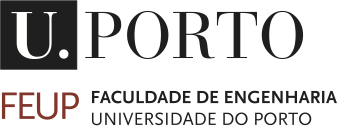   
<h1> <b>Machine Learning 2023/2024 (2<sup>nd</sup> semester) </b> </h1>
<p>Master in Electrical and Computer Engineering </p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt),
**Aníbal Matos** (anibal@fe.up.pt),
**Andry Pinto** (amgp@fe.up.pt),
**Daniel Campos** (dfcampos@fe.up.pt),
**Maria Inês Pereira** (maria.ines@fe.up.pt)

FEUP, Mar. 2024

---


# **Project #02**

**Note:** This work is to be done in group of **2** elements. Use this notebook to answer all the questions. At the end of the work, you should **upload** the **notebook** and a **pdf file** with a printout of the notebook with all the results in the **moodle** platform.
To generate the pdf file we have first to covert the notebook to html using the command `!jupyter nbconvert --to html "ML_project2.ipynb"`, then open the html file and printout to PDF.

**Deadlines:** Present you work (and answer questions) on the week of **May 20** in your corresponding practical class. Upload the files until 23:59 of **May 31, 2024**.


---



# **Identification**

* **Group:** A06_B
* **Name:** Bruno Filipe Torres Costa
* **Student Number:** 202004966

* **Name:** André Silva Martins
* **Student Number:** 202006053


---


**Initial setup:** To download the data files, run the next cell.

In [1]:
#!wget -O data-setMLproject2.zip https://www.dropbox.com/s/hnyhgqlj5lcqyqr/data-setMLproject2.zip?dl=0 --quiet
#!unzip data-setMLproject2.zip -d.


# **Main goal**

Consider the following scenario: A mobile robot aims to build a map of the environment with **semantics**, meaning that the robot should be capable to classify the objects nearby. The robot is travelling around and carries on-board a 2D LIDAR measurement device that obtains range measurements at each sample time $t=0, 0.1, 0.2, \ldots$ The following cell shows an example of the type of data:


In [2]:
import pandas as pd
df_test2obs = pd.read_csv('data_test2obs.csv', index_col=0)
df_test2obs.head(5)
#df

# By convention, zero values mean no range measurements.
# The units are:
# [m] for px and py (position of the robot)
# [m] for the LIDAR ranges

,px,py,angle -179,angle -178,angle -177,angle -176,angle -175,angle -174,angle -173,angle -172,...,angle 171,angle 172,angle 173,angle 174,angle 175,angle 176,angle 177,angle 178,angle 179,angle 180
0,-4.00,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-3.98,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-3.96,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-3.94,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-3.92,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Note that the LIDAR measurements consist of range (distance) from the robot to a possible obstacle for each degree of direction, that is,
$$
r_t = \{r_\beta + \eta_r : \beta=-179^o, -178^o, \ldots, 0^o, \ldots, 180^o\}
$$
where $\eta_r$ is assumed to be Gaussian noise. If there is no obstacle within the direction of the laser range or if it is far away, that is, if the distance is greater than $5\,m$, by convention the range measurement is set to zero. Moreover, with a small probability, the range measurements could be corrupted with *outliers*.

The next figure shows $r_t$ as a function of the angle $\beta$ taken at time $t=1.0\,s$.


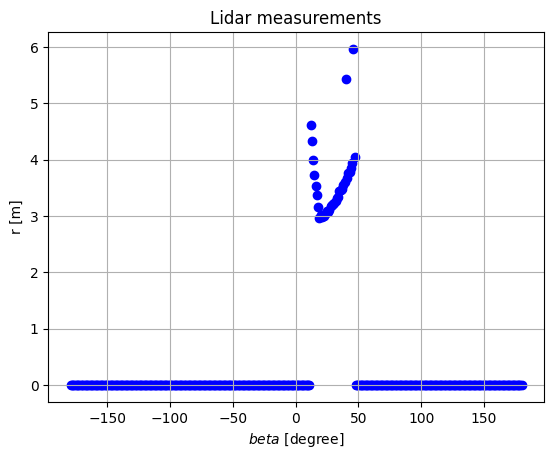

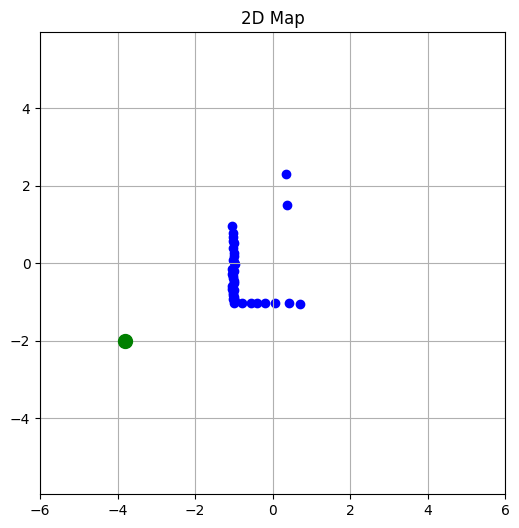

In [3]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt

Lidar_range = df_test2obs.iloc[:, np.arange(2,362,1)].values
px = df_test2obs["px"].values
py = df_test2obs["py"].values

t=1*10 #1sec times number of samples/second
angle = np.linspace(-179, 180, num=360)

plt.figure()
plt.scatter(angle, Lidar_range[t], color='b')
plt.title('Lidar measurements')
plt.ylabel('r [m]')
plt.xlabel('$beta$ [degree]')
plt.grid()
plt.show()

#Build the cloud points in 2D plan
x_o, y_o = [], []
for i in range(len(Lidar_range[t])):
  if Lidar_range[t][i] > 0:
    x_o.append(px[t]+Lidar_range[t][i]*np.cos(angle[i]/180*np.pi))
    y_o.append(py[t]+Lidar_range[t][i]*np.sin(angle[i]/180*np.pi))

fig, ax = plt.subplots(figsize=(6,6))
ax.axis('equal')
xdim, ydim = 5, 5
plt.xlim(-xdim-1,xdim+1)
plt.ylim(-ydim-1,ydim+1)
plt.plot(px[t], py[t], 'g.', ms=20)  #position of the robot
plt.grid()

plt.scatter(x_o, y_o, color='b')
plt.title('2D Map')
plt.show()

Note that it may be possible to have more than one object in the range of the LIDAR. 
Here goes an example when $t=32\,s$:


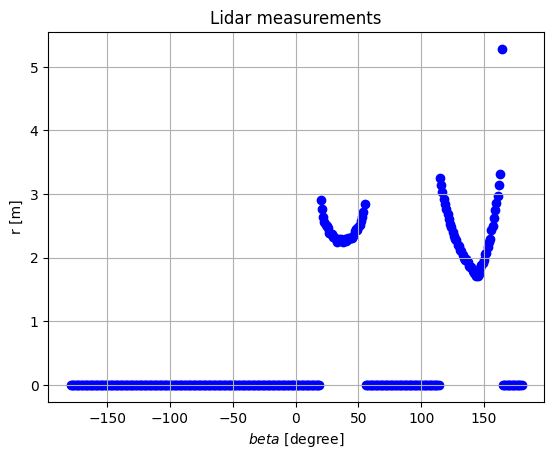

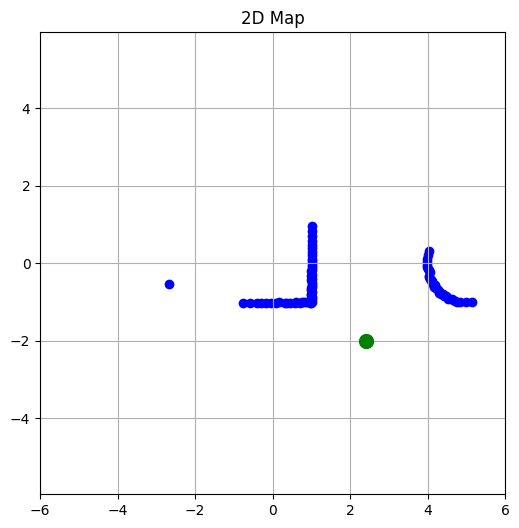

In [4]:
t=32*10 #5sec times number of samples/second
angle = np.linspace(-179, 180, num=360)

plt.figure()
plt.scatter(angle, Lidar_range[t], color='b')
plt.title('Lidar measurements')
plt.ylabel('r [m]')
plt.xlabel('$beta$ [degree]')
plt.grid()
plt.show()

#Build the cloud points in 2D plan
x_o, y_o = [], []
for i in range(len(Lidar_range[t])):
  if Lidar_range[t][i] > 0:
    x_o.append(px[t]+Lidar_range[t][i]*np.cos(angle[i]/180*np.pi))
    y_o.append(py[t]+Lidar_range[t][i]*np.sin(angle[i]/180*np.pi))

fig, ax = plt.subplots(figsize=(6,6))
ax.axis('equal')
xdim, ydim = 5, 5
plt.xlim(-xdim-1,xdim+1)
plt.ylim(-ydim-1,ydim+1)
plt.plot(px[t], py[t], 'g.', ms=20)  #position of the robot
plt.grid()

plt.scatter(x_o, y_o, color='b')
plt.title('2D Map')
plt.show()

# **Part 1: Classification of one object**

At this point, the goal is to classify only one object that could be a square or a circle at each LIDAR snapshot. 

To this end, it was performed a set of 4 experiments for each obstacle (alone) where in each experiment the robot travelled during $40\,s$ with a constant speed and constant direction (horizontal line segment from left to right) from the initial position $(p_x, p_y) = (-4, \bar y)$ to the final position $(p_x, p_y) = (4, \bar y)$, where $\bar y = -4, -3, -2, -1\, m$ 
The obstacle (circle and square) were placed at the center of the origin $(0,0)$. 

All the experiments were combined in a unique dataset and then randomly split into two datasets: the trainning data set (70%) and the testing data set (30%). The content of each data set are displayed next.

In [5]:
import pandas as pd
df_train = pd.read_csv('data_train.csv', index_col=0)
df_train

,px,py,angle -179,angle -178,angle -177,angle -176,angle -175,angle -174,angle -173,angle -172,...,angle 172,angle 173,angle 174,angle 175,angle 176,angle 177,angle 178,angle 179,angle 180,label
0,-3.06,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.48,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.58,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-3.10,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-1.48,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2.60,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2236,-2.12,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2237,-2.80,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2238,1.18,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [6]:
import pandas as pd
df_test = pd.read_csv('data_test.csv', index_col=0)
df_test

,px,py,angle -179,angle -178,angle -177,angle -176,angle -175,angle -174,angle -173,angle -172,...,angle 172,angle 173,angle 174,angle 175,angle 176,angle 177,angle 178,angle 179,angle 180,label
0,-3.46,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.0
1,0.38,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
2,2.58,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
3,-2.84,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.0
4,-2.56,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,3.32,-1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.752938,2.789123,2.869662,2.960473,3.041882,3.292784,0.0,0.0,0.0,1.0
956,3.62,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0
957,2.20,-1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.381054,1.557405,1.728042,2.111385,2.553902,0.000000,0.0,0.0,0.0,2.0
958,-2.98,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0


Note that there is an extra column (the label column) that indicates if the obstacle is a **circle (label 1)** or a **square (label 2)**.

**1.1**
Implement a **$k$-nearest neighbor ($k$-NN)** classifier that receives the parameter $k$, the sample to classify (that are the range measurements at one snapshot), and a set of labeled training data. 

Do not use sklearn or similar packages (use the results of notebook #7).

In [7]:
# To complete
X_train = df_train.iloc[:, np.arange(2,362,1)].values
Y_train = df_train["label"].values
data_train = df_train.iloc[:, np.arange(2,363,1)].values  #it also includes the label

# KNN
def vector2norm(x, data):
  npoints = data.shape[0]
  distances = np.zeros(npoints)
  for i in range(npoints) :
    distances[i] = np.linalg.norm(x - data[i, :-1])
  return distances

def kNN_classifier(k, x, data):
  npoints = data.shape[0]
  # compute distance to training points
  dist = vector2norm(x, data)
  # sort along increasing distances
  ind = np.argsort(dist, axis=0)
  classes = data[:, -1]
  classes_sorted = classes[ind]
  # determine class with more elements in the k neighborhood
  c1 = 0
  c2 = 0
  for i in range(k):
    if classes_sorted[i]==1:
      c1 +=1
    else:
      c2 +=1
  if c1>c2:
    return 1
  else:
    return 2

**1.2**
Test the $k$-NN classifier for the `data_train.csv` set and for the `data_test.csv` set and obtain the respectively accuracy for $k=1,3,5,7,9$ 


Note that accuracy is defined as
$$acc = \frac{\#\text{correct predictions}}{\#\text{all predictions}} = \frac{TP+TN}{TP+TN+FP+FN}$$

where TP are the true positives, TN true negatives, FP false positives, and FN the fale negatives.


In [8]:
# Let's check for all trainning data
data_train = np.append(X_train, np.reshape(Y_train, (len(Y_train), 1)), axis=1)

# Compute KNN
classification = []
K = 3
for t in range(len(X_train)):
    if kNN_classifier(K, X_train[t], data_train) == 1:
        classification.append(1)
    else:
        classification.append(2)

# Classification of the training data (expected the same as the data_train Label)
#print(classification)

In [9]:
# Let's check for the testing data
X_test = df_test.iloc[:, np.arange(2,362,1)].values
Y_test = df_test["label"].values

# Let's check for all test data
data_test = np.append(X_test, np.reshape(Y_test, (len(Y_test), 1)), axis=1)

# Compute KNN
classification = []
K = 1
for t in range(len(X_test)):
    if kNN_classifier(K, X_test[t], data_train) == 1:
        classification.append(1)
    else:
        classification.append(2)

# Classification of the test data
#print(classification)

# printing the results
correct = 0
for i in range(len(Y_test)):
    if classification[i] == Y_test[i]:
        correct +=1

acc = correct/len(Y_test)
print(f"Accuracy of the model with k = {K} : {100.0*acc:4.2f}%")

Accuracy of the model with k = 1 : 100.00%


In [10]:
# Let's check for the testing data
X_test = df_test.iloc[:, np.arange(2,362,1)].values
Y_test = df_test["label"].values

# Let's check for all test data
data_test = np.append(X_test, np.reshape(Y_test, (len(Y_test), 1)), axis=1)

# Compute KNN
classification = []
K = 3
for t in range(len(X_test)):
    if kNN_classifier(K, X_test[t], data_train) == 1:
        classification.append(1)
    else:
        classification.append(2)

# Classification of the test data
#print(classification)

# printing the results
correct = 0
for i in range(len(Y_test)):
    if classification[i] == Y_test[i]:
        correct +=1

acc = correct/len(Y_test)
print(f"Accuracy of the model with k = {K} : {100.0*acc:4.2f}%")

Accuracy of the model with k = 3 : 99.48%


In [11]:
# Let's check for the testing data
X_test = df_test.iloc[:, np.arange(2,362,1)].values
Y_test = df_test["label"].values

# Let's check for all test data
data_test = np.append(X_test, np.reshape(Y_test, (len(Y_test), 1)), axis=1)

# Compute KNN
classification = []
K = 5
for t in range(len(X_test)):
    if kNN_classifier(K, X_test[t], data_train) == 1:
        classification.append(1)
    else:
        classification.append(2)

# Classification of the test data
#print(classification)

# printing the results
correct = 0
for i in range(len(Y_test)):
    if classification[i] == Y_test[i]:
        correct +=1

acc = correct/len(Y_test)
print(f"Accuracy of the model with k = {K} : {100.0*acc:4.2f}%")

Accuracy of the model with k = 5 : 99.27%


In [12]:
# Let's check for the testing data
X_test = df_test.iloc[:, np.arange(2,362,1)].values
Y_test = df_test["label"].values

# Let's check for all test data
data_test = np.append(X_test, np.reshape(Y_test, (len(Y_test), 1)), axis=1)

# Compute KNN
classification = []
K = 7
for t in range(len(X_test)):
    if kNN_classifier(K, X_test[t], data_train) == 1:
        classification.append(1)
    else:
        classification.append(2)

# Classification of the test data
#print(classification)

# printing the results
correct = 0
for i in range(len(Y_test)):
    if classification[i] == Y_test[i]:
        correct +=1

acc = correct/len(Y_test)
print(f"Accuracy of the model with k = {K} : {100.0*acc:4.2f}%")

Accuracy of the model with k = 7 : 99.69%


In [13]:
# Let's check for the testing data
X_test = df_test.iloc[:, np.arange(2,362,1)].values
Y_test = df_test["label"].values

# Let's check for all test data
data_test = np.append(X_test, np.reshape(Y_test, (len(Y_test), 1)), axis=1)

# Compute KNN
classification = []
K = 9
for t in range(len(X_test)):
    if kNN_classifier(K, X_test[t], data_train) == 1:
        classification.append(1)
    else:
        classification.append(2)

# Classification of the test data
#print(classification)

# printing the results
correct = 0
for i in range(len(Y_test)):
    if classification[i] == Y_test[i]:
        correct +=1

acc = correct/len(Y_test)
print(f"Accuracy of the model with k = {K} : {100.0*acc:4.2f}%")

Accuracy of the model with k = 9 : 99.58%


**1.3**
Implement an Artificial Neural Network (ANN) of the type multi-layer perceptron (MLP) with
1. an input layer that receives the first 10 nonzero range measurements (for each snapshot);  
2. one hidden layer with 5 neurons with activation functions of the type ReLU (rectified linear unit);
3. an output layer with 1 neuron with a sigmoid activation function;

4. a loss function of the type mean square error.

Train the ANN using the `data_train.csv` set.

**Do not use** PyTorch, TensorFlow or similar packages (check notebook #8). 

**Tip:** It is important to shuffle the training data. You may get better results with non constant learning rate. A final loss below 0.05 is good!


In [14]:
import numpy as np
np.random.seed(42)

N_INPUTS = 10  #Number of inputs

def mse_loss(y_true, y_pred):
  return ((y_true - y_pred) ** 2).mean()

# Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
def deriv_sigmoid(x):
  fx = sigmoid(x)
  return fx * (1 - fx)

# ReLu activation function:
def relu(x):
  if x > 0:
    return x
  else :
    return 0

# Derivative of ReLu
def deriv_relu(x):
  if x > 0:
    return 1
  else :
    return 0

class NeuralNetwork:
  '''
  Structure of the neural network:
    - N_INPUTS inputs
    - a hidden layer with 5 neurons (h1, h2, h3, h4, h5)
    - an output layer with 1 neuron (o1)
  '''
  def __init__(self):

    # Biases
    self.b1 = np.random.random()
    self.b2 = np.random.random()
    self.b3 = np.random.random()
    self.b4 = np.random.random()
    self.b5 = np.random.random()
    self.bo = np.random.random()

    # # Weights
    self.w1o, self.w2o, self.w3o, self.w4o, self.w5o = np.random.random(5)
    self.wi1 = np.random.random(N_INPUTS)
    self.wi2 = np.random.random(N_INPUTS)
    self.wi3 = np.random.random(N_INPUTS)
    self.wi4 = np.random.random(N_INPUTS)
    self.wi5 = np.random.random(N_INPUTS)


  def feedforward(self, x):
    '''
    - x is a numpy array with N_INPUTS elements.
    '''

    # # Hidden layer
    self.sum_h1 = np.dot(self.wi1, x) + self.b1
    self.h1 = relu(self.sum_h1)
    self.sum_h2 = np.dot(self.wi2, x) + self.b2
    self.h2 = relu(self.sum_h2)
    self.sum_h3 = np.dot(self.wi3, x) + self.b3
    self.h3 = relu(self.sum_h3)
    self.sum_h4 = np.dot(self.wi4, x) + self.b4
    self.h4 = relu(self.sum_h4)
    self.sum_h5 = np.dot(self.wi5, x) + self.b5
    self.h5 = relu(self.sum_h5)

    # Output layer
    self.sum_o1 = self.w1o*self.h1 + self.w2o*self.h2 + self.w3o*self.h3 + self.w4o*self.h4 + self.w5o*self.h5 + self.bo
    self.o1 = sigmoid(self.sum_o1)
    return self.o1


  def train(self, data, y_trues, learn_rate = 0.1, epochs = 500):
    '''
    - data is a (n x N_INPUTS) numpy array, n = # of samples in the dataset.
    - y_trues is a numpy array with n elements.
      Elements in y_true correspond to those in data.
    '''
    loss_prev = 10000  #loss_prev is the loss of the previous iteration
    for epoch in range(epochs):
      for x, y_true in zip(data, y_trues):
        
        # *************************************************
        # 1. Feedforward Step
        y_pred = self.feedforward(x)

        # *************************************************
        # 2. Backpropagation Step

        # Partial derivatives.
        d_L_d_ypred = -2 * (y_true - y_pred)

        # Output Layer:  Neuron o1
        d_ypred_d_w1o = self.h1 * deriv_sigmoid(self.sum_o1)
        d_ypred_d_w2o = self.h2 * deriv_sigmoid(self.sum_o1)
        d_ypred_d_w3o = self.h3 * deriv_sigmoid(self.sum_o1)
        d_ypred_d_w4o = self.h4 * deriv_sigmoid(self.sum_o1)
        d_ypred_d_w5o = self.h5 * deriv_sigmoid(self.sum_o1)
        d_ypred_d_bo = deriv_sigmoid(self.sum_o1)

        d_ypred_d_h1 = self.w1o * deriv_sigmoid(self.sum_o1)
        d_ypred_d_h2 = self.w2o * deriv_sigmoid(self.sum_o1)
        d_ypred_d_h3 = self.w3o * deriv_sigmoid(self.sum_o1)
        d_ypred_d_h4 = self.w4o * deriv_sigmoid(self.sum_o1)
        d_ypred_d_h5 = self.w5o * deriv_sigmoid(self.sum_o1)

        # Hidden Layer: Neuron h1
        d_h1_d_wi1 = np.dot(x, deriv_relu(self.sum_h1))
        d_h1_d_b1 = deriv_relu(self.sum_h1)

        # Hidden Layer: Neuron h2
        d_h2_d_wi2 = np.dot(x, deriv_relu(self.sum_h2))
        d_h2_d_b2 = deriv_relu(self.sum_h2)

        # Hidden Layer: Neuron h3
        d_h3_d_wi3 = np.dot(x, deriv_relu(self.sum_h3))
        d_h3_d_b3 = deriv_relu(self.sum_h3)

        # Hidden Layer: Neuron h4
        d_h4_d_wi4 = np.dot(x, deriv_relu(self.sum_h4))
        d_h4_d_b4 = deriv_relu(self.sum_h4)

        # Hidden Layer: Neuron h5
        d_h5_d_wi5 = np.dot(x, deriv_relu(self.sum_h5))
        d_h5_d_b5 = deriv_relu(self.sum_h5)

        # *************************************************
        # 3. Gradient Descent
        # Output Layer:  Neuron o1
        self.w1o -= learn_rate * d_L_d_ypred * d_ypred_d_w1o
        self.w2o -= learn_rate * d_L_d_ypred * d_ypred_d_w2o
        self.w3o -= learn_rate * d_L_d_ypred * d_ypred_d_w3o
        self.w4o -= learn_rate * d_L_d_ypred * d_ypred_d_w4o
        self.w5o -= learn_rate * d_L_d_ypred * d_ypred_d_w5o
        self.bo -= learn_rate * d_L_d_ypred * d_ypred_d_bo

        # Hidden Layer: Neuron h1
        self.wi1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_wi1  
        self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1  

        # Hidden Layer: Neuron h2
        self.wi2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_wi2  
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2  

        # Hidden Layer: Neuron h3
        self.wi3 -= learn_rate * d_L_d_ypred * d_ypred_d_h3 * d_h3_d_wi3  
        self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_h3 * d_h3_d_b3  

        # Hidden Layer: Neuron h4
        self.wi4 -= learn_rate * d_L_d_ypred * d_ypred_d_h4 * d_h4_d_wi4  
        self.b4 -= learn_rate * d_L_d_ypred * d_ypred_d_h4 * d_h4_d_b4  

        # Hidden Layer: Neuron h5
        self.wi5 -= learn_rate * d_L_d_ypred * d_ypred_d_h5 * d_h5_d_wi5  
        self.b5 -= learn_rate * d_L_d_ypred * d_ypred_d_h5 * d_h5_d_b5  

      # *************************************************
      # 4. Performance assessment (per epoch)
      if epoch % 5 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(y_trues, y_preds)
        print("Epoch %d  --> Loss: %.4f" % (epoch, loss))
# Uncomment this part to enable a nonconstant learning rate
#        if loss > loss_prev:  #if loss did not decrease, let's decrease the learn_rate
#         if learn_rate > 0.002:
#           learn_rate = learn_rate*.9  #decrease 90% of the previous value
#         print("I'm at epoch", epoch, "with new learn_rate: ", learn_rate)
#       loss_prev = loss


# Create the ANN
model = NeuralNetwork()

# Build the Trainingset (with the first nonzero N_INPUTS ranges)
trainingset_X = np.zeros([len(Y_train), N_INPUTS])
for t in range(len(Y_train)):
  j=0
  for i in range(360):
    if X_train[t][i] > 0:
      if j < N_INPUTS:
        trainingset_X[t][j] = X_train[t][i]
        j +=1

# Trainingset: here the labels are 0 or 1
trainingset_Y = Y_train-1

# Shuffling the set...
from sklearn.utils import shuffle
trainingset_X, trainingset_Y = shuffle(trainingset_X, trainingset_Y, random_state=42)

# Train the ANN
model.train(trainingset_X, trainingset_Y, learn_rate = 0.1, epochs = 2000)

Epoch 0  --> Loss: 0.4999
Epoch 5  --> Loss: 0.2116
Epoch 10  --> Loss: 0.1859
Epoch 15  --> Loss: 0.1925
Epoch 20  --> Loss: 0.1870
Epoch 25  --> Loss: 0.1788
Epoch 30  --> Loss: 0.1730
Epoch 35  --> Loss: 0.1727
Epoch 40  --> Loss: 0.1743
Epoch 45  --> Loss: 0.1757
Epoch 50  --> Loss: 0.1617
Epoch 55  --> Loss: 0.1708
Epoch 60  --> Loss: 0.1679
Epoch 65  --> Loss: 0.1658
Epoch 70  --> Loss: 0.1632
Epoch 75  --> Loss: 0.1617
Epoch 80  --> Loss: 0.1601
Epoch 85  --> Loss: 0.1592
Epoch 90  --> Loss: 0.1576
Epoch 95  --> Loss: 0.1575
Epoch 100  --> Loss: 0.1564
Epoch 105  --> Loss: 0.1552
Epoch 110  --> Loss: 0.1547
Epoch 115  --> Loss: 0.1529
Epoch 120  --> Loss: 0.1516
Epoch 125  --> Loss: 0.1498
Epoch 130  --> Loss: 0.1474
Epoch 135  --> Loss: 0.1412
Epoch 140  --> Loss: 0.1411
Epoch 145  --> Loss: 0.1400
Epoch 150  --> Loss: 0.1373
Epoch 155  --> Loss: 0.1103
Epoch 160  --> Loss: 0.0984
Epoch 165  --> Loss: 0.0948
Epoch 170  --> Loss: 0.1225
Epoch 175  --> Loss: 0.0831
Epoch 180  -->

**1.4**
Test the ANN classifier for the `data_train.csv` set and for the `data_test.csv` set and obtain the respectively accuracy. Write in a brief sentence of the main conclusions about the classifiers (k-NN and ANN) until this point.

In [21]:
# To complete

# Evaluation with the Training set
classification = []
for t in range(len(Y_train)):
  classification.append( model.feedforward(trainingset_X[t]) )
classification = np.array(classification)
error_clas = 0

for t in range(len(classification)):
  if (classification[t] >= 0.5) and trainingset_Y[t]  == 0:
    error_clas +=1
  if (classification[t] < 0.5) and trainingset_Y[t]  == 1:
    error_clas +=1

print("Number of misclassified samples in the training data: ", error_clas, "in", len(Y_train))
acc = 1 - (error_clas/len(Y_train))
print(f"Accuracy of the model: {100.0*acc:4.2f}%")


# Evaluation with Test_set

# Build the Testset (with the first nonzero N_INPUTS ranges)
testset_X = np.zeros([len(Y_test), N_INPUTS])
for t in range(len(Y_test)):
  j=0
  for i in range(360):
    if X_test[t][i] > 0:
      if j < N_INPUTS:
        testset_X[t][j] = X_test[t][i]
        j +=1

# Testset: here the labels are 0 or 1
testset_Y = Y_test-1

classification = []
for t in range(len(Y_test)):
  classification.append( model.feedforward(testset_X[t]) )
classification = np.array(classification)
error_clas = 0

for t in range(len(classification)):
  if (classification[t] >= 0.5) and testset_Y[t]  == 0:
    error_clas +=1
  if (classification[t] < 0.5) and testset_Y[t]  == 1:
    error_clas +=1

print("Number of misclassified samples in the testing data: ", error_clas, "in", len(Y_test))
acc = 1 - (error_clas/len(Y_test))
print(f"Accuracy of the model: {100.0*acc:4.2f}%")

Number of misclassified samples in the training data:  94 in 2240
Accuracy of the model: 95.80%
Number of misclassified samples in the testing data:  41 in 960
Accuracy of the model: 95.73%


Explain ...

# **Part 2: Classification of two objects**

We would like now to use the previous ANN classifier to the data in `data_test2obs.csv` that may have two objects at the same snapshot. The idea is to before send the range measurements to the classifier, apply first a k-means at each snapshot to separate the data into two sub-sets such that each sub-set only contains data of one object. Then, send each subset of data to the ANN classifier.

**2.1**
Implement the k-means algorithm and test it for two snapshots **converted to the 2D map** (that is, the input data for the k-means is the 2D map) of the dataset `data_test2obs.csv` for
1. $t=1\,s$ (which has only one object) and
2. for $t=32\,s$ (which has 2 objects).

What can you conclude? 
Do not use sklearn or similar packages (use the results of notebook #10).


In [16]:
import pandas as pd
df_test2obs = pd.read_csv('data_test2obs.csv', index_col=0)

Lidar_range = df_test2obs.iloc[:, np.arange(2,362,1)].values
px = df_test2obs["px"].values
py = df_test2obs["py"].values

In [17]:
def kmeans_func(X_func, K_func, show_plot=0, ini_method=0):
  '''
    X_func are sample points;
    K_func is the number of clusters;
    showplot 0/1 - not / show centroid evolution over iterations;
    ini_method 0/1 - ini centroids 0=> with random within data bounderies or 1=>from the initial points (risky!)
  '''
  cluster = np.zeros(X_func.shape[0],dtype=int)
  centr_ini = []
  if ini_method:  # 1 is points, 0 is random
    # Initial centroids are sample points (risky!)
    for i in range(K_func):
      centr_ini.append(X_func[i])
  else:
    # Non absurd Random Initial Centroids
    max0 = max(X_func[:,0]);
    min0 = min(X_func[:,0]);
    max1 = max(X_func[:,1]);
    min1 = min(X_func[:,1]);

    for i in range(K_func):
      centr_ini.append([random.uniform(min0,max0),random.uniform(min1,max1)])

  iter = 0
  diff = 1
  centroids = centr_ini
  centr_list = [centroids]

  while diff:
    # for each sample
    for sample_i, sample_pt in enumerate(X_func):
      min_dist = float('inf')
      # dist of the point from all centroids
      for centroid_i, centroid in enumerate(centroids):
        dist =  np.sqrt( (sample_pt[0] - centroid[0])**2 + (sample_pt[1] - centroid[1])**2 )
        # store closest centroid
        if dist < min_dist:
          min_dist = dist
          cluster[sample_i] = centroid_i
          
          

    sum = np.zeros((K_func,2))
    cnt = np.zeros(K_func)
    for sample_i, sample_pt in enumerate(X_func):
      sum[cluster[sample_i]] += X_func[sample_i]
      cnt[cluster[sample_i]] += 1
    new_centroids = np.zeros((K_func,2))
    for k in range(K_func):
      if (cnt[k]>0):
        new_centroids[k] = sum[k] / cnt[k]
      else:
        # hopefully, the next iteration will fix uninteresting centroid
        new_centroids[k] = [random.uniform(min0,max0),random.uniform(min1,max1)]


    # if centroids are same then leave
    if np.count_nonzero(centroids-new_centroids) == 0:
      diff = 0
    else:
      centroids = new_centroids
      centr_list.append(new_centroids)
    iter = iter+1

  print("Number of iterations", iter)
  #print(centr_list)

  if show_plot: # pretty subplotting
    cols = min(iter,6) # max 6 plots
    fig, ax = plt.subplots(nrows=1, ncols=cols, figsize=(20,3))
    for col in range(min(cols,iter)):
      ax[col].scatter(X_func[:, 0], X_func[:, 1], s=3, c=np.zeros(X_func.shape[0]), cmap='Set2')
      i = round(iter/cols*col)
      if (col==cols-1):
        i = iter-1
      ## print("centr %s", i,"=>", centr_list[i])
      ## devia funcionar ### ax[row, col].scatter(centr_list[i][:,0], centr_list[i][:,1], c='black', s=200, alpha=0.5);
      for j in range(K_func):
        centr_plot_x = centr_list[i][j][0]
        centr_plot_y = centr_list[i][j][1]
        ax[col].scatter(centr_plot_x, centr_plot_y, c=j, s=60, alpha=0.3, cmap='Set1')
        ax[col].title.set_text("it " + str(i) )
    plt.show()

  return centroids, cluster

Number of iterations 5


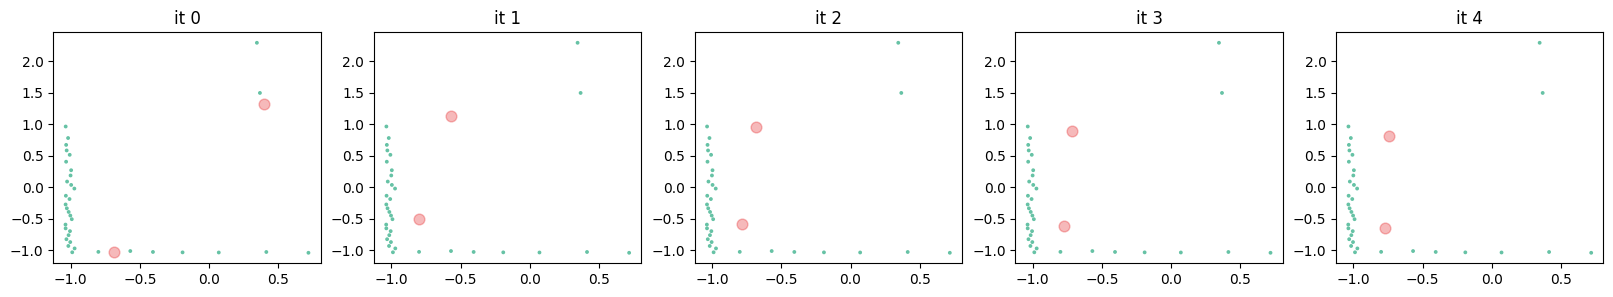

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


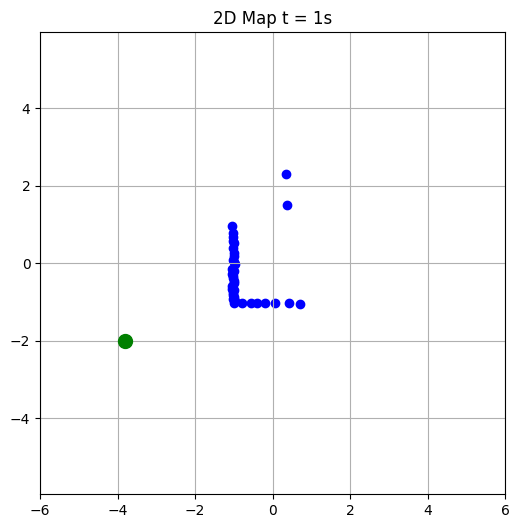

In [23]:
# Build the cloud points in 2D map (t = 1s)
x_o, y_o = [], []

t=10*1
for i in range(len(Lidar_range[t])):
  if Lidar_range[t][i] > 0:
    x_o.append(px[t]+Lidar_range[t][i]*np.cos(angle[i]/180*np.pi))
    y_o.append(py[t]+Lidar_range[t][i]*np.sin(angle[i]/180*np.pi))

X = np.array([x_o, y_o]).T
centr, clust = kmeans_func(X, 2, show_plot=1, ini_method=0)
print(clust)

fig, ax = plt.subplots(figsize=(6,6))
ax.axis('equal')
xdim, ydim = 5, 5
plt.xlim(-xdim-1,xdim+1)
plt.ylim(-ydim-1,ydim+1)
plt.plot(px[t], py[t], 'g.', ms=20)  #position of the robot
plt.grid()

plt.scatter(x_o, y_o, color='b')
plt.title('2D Map t = 1s')
plt.show()

Number of iterations 2


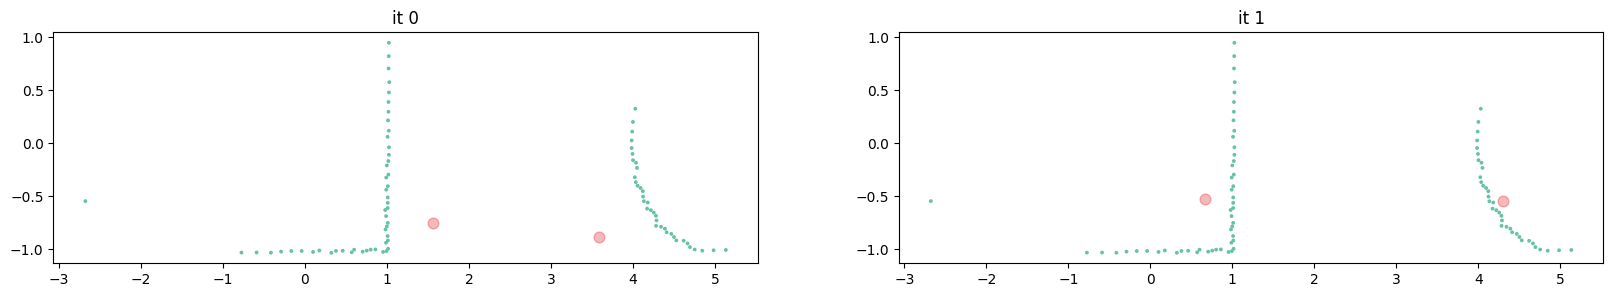

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


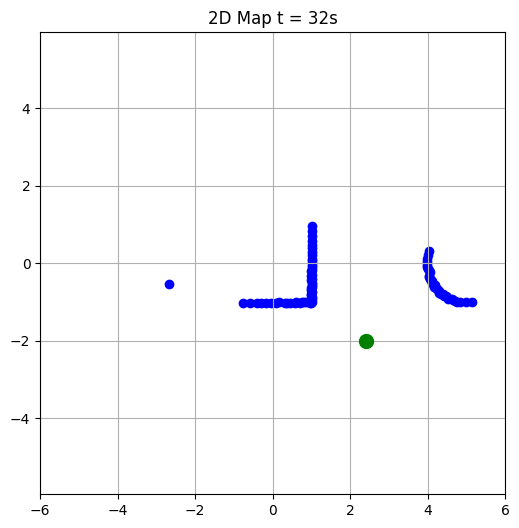

In [19]:
# Build the cloud points in 2D map (t = 1s)
x_o, y_o = [], []

t=10*32
for i in range(len(Lidar_range[t])):
  if Lidar_range[t][i] > 0:
    x_o.append(px[t]+Lidar_range[t][i]*np.cos(angle[i]/180*np.pi))
    y_o.append(py[t]+Lidar_range[t][i]*np.sin(angle[i]/180*np.pi))

X = np.array([x_o, y_o]).T
centr, clust = kmeans_func(X, 2, show_plot=1, ini_method=0)
print(clust)

fig, ax = plt.subplots(figsize=(6,6))
ax.axis('equal')
xdim, ydim = 5, 5
plt.xlim(-xdim-1,xdim+1)
plt.ylim(-ydim-1,ydim+1)
plt.plot(px[t], py[t], 'g.', ms=20)  #position of the robot
plt.grid()

plt.scatter(x_o, y_o, color='b')
plt.title('2D Map t = 32s')
plt.show()

**2.2**
Using the previous results,
1. implement a method to automatically identify for each snapshot if it has 1 or 2 objects;
2. build a new test set with all the data in `data_test2obs.csv`, but now the new test set only has 1 object in each snapshot (and therefore this data set has more lines);
3. test this new data set using the ANN classifier.

Plot the position of the robot and the classified objects for some snapshots. What are the main conclusions?

In [20]:
# To complete

Threshold = ...  # to decide if k=1 or k=2,

Lidar_range = df_test2obs.iloc[:, np.arange(2,362,1)].values
px = df_test2obs["px"].values
py = df_test2obs["py"].values

def SSE(X, centroids, cluster):
  '''
    returns the Sum of Squared Error
    X are the 2D points
    centroids are the cluster centers
    cluster is the cluster that each data point belongs to
  '''
  sum = 0
  for i, val in enumerate(X):
    sum += np.sqrt((centroids[cluster[i], 0]-val[0])**2 +(centroids[cluster[i], 1]-val[1])**2)  ####
  return sum

# Building the data set for ANN testing using k-means to split objects

test_set_X = np.array([])
# ...

  X = np.array([x_o, y_o]).T
  cost_list = []
  k_range = range(1, 3)
  for k in k_range:
    centr, clust = kmeans_func(X, k, show_plot=0, ini_method=0)
    # Calculate SSE
    cost = SSE(X, centr, clust)
    cost_list.append(cost)
  #Let's now decide if this snapshot has 1 or 2 obstacles
  if ...
    #2 objects
    X_feature1, X_feature2 = np.zeros([N_INPUTS]), np.zeros([N_INPUTS])
    j1,j2=0,0
    for i in range(len(x_o)):
      if j1 < N_INPUTS:
        if clust[i] == 0:
          X_feature1[j1]=np.sqrt((x_o[i]-px[t])**2 + (y_o[i]-py[t])**2)
          j1=j1+1
      if j2 < N_INPUTS:
        if clust[i] == 1:
          X_feature2[j2]=np.sqrt((x_o[i]-px[t])**2 + (y_o[i]-py[t])**2)
          j2=j2+1
    if len(test_set_X) == 0:
      test_set_X = np.array([X_feature1, X_feature2])
    else:
      test_set_X = np.concatenate((test_set_X,np.array([X_feature1, X_feature2])))
  else: #only one object
    X_feature1 = np.zeros([N_INPUTS])
    j1=0
    for i in range(len(x_o)):
      if j1 < N_INPUTS:
        if clust[i] == 0:
          X_feature1[j1]=np.sqrt((x_o[i]-px[t])**2 + (y_o[i]-py[t])**2)
          j1=j1+1
    if len(test_set_X) == 0:
      test_set_X = np.array([X_feature1])
    else:
      test_set_X = np.concatenate((test_set_X,np.array([X_feature1])))


# ...

IndentationError: unexpected indent (399136613.py, line 26)

**2.3 (Extra)**
Using now PyTorch or other similar package, implement a better ANN (meaning with a better accuracy) and test it.

**Note:** This question is optional. If you solve it, you get extra 15 points (in 100).

#### The Shape Classifier Module using PyTorch

In [167]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd

In [168]:
class Shape_Classifier_Module(nn.Module):

    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        # Initialize the modules we need to build the network
        self.linear1         = nn.Linear(num_inputs, num_hidden)
        self.activation_f1   = nn.ReLU()
        self.linear2         = nn.Linear(num_hidden, num_outputs)
        self.activation_sig  = nn.Sigmoid()           #  COMMENT if nn.BCEWithLogitsLoss is selected.

    def forward(self, x):
        # Perform the calculation of the model to determine the prediction
        x = self.linear1(x)
        x = self.activation_f1(x)
        x = self.linear2(x)
        x = self.activation_sig(x)                   #  COMMENT if nn.BCEWithLogitsLoss is selected.
        return x

In [169]:
N_INPUTS = 10
model = Shape_Classifier_Module(num_inputs=N_INPUTS, num_hidden=6, num_outputs=1)
# Printing a module shows all its submodules
print(model)

Shape_Classifier_Module(
  (linear1): Linear(in_features=10, out_features=6, bias=True)
  (activation_f1): ReLU()
  (linear2): Linear(in_features=6, out_features=1, bias=True)
  (activation_sig): Sigmoid()
)


In [170]:
# Specific model parameters
for name, param in model.named_parameters():
    print(f"Parameter {name}, shape {param.shape}")

# All model parameter
#model.state_dict()   #PyTorch assigns random values to these weights and biases

Parameter linear1.weight, shape torch.Size([6, 10])
Parameter linear1.bias, shape torch.Size([6])
Parameter linear2.weight, shape torch.Size([1, 6])
Parameter linear2.bias, shape torch.Size([1])


### Prepare data

In [171]:
import torch.utils.data as data

SEED = 1234
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

In [172]:
# Run cells that load the dataframes

# Training Data
X_train = df_train.iloc[:, np.arange(2,362,1)].values
Y_train = df_train["label"].values
data_train = df_train.iloc[:, np.arange(2,363,1)].values  #it also includes the label

# Testing Data
X_test = df_test.iloc[:, np.arange(2,362,1)].values
Y_test = df_test["label"].values

# Between 0 and 1
Y_train = Y_train - 1
Y_test = Y_test - 1

# Build the Trainingset (with the first nonzero N_INPUTS ranges)
trainingset_X = np.zeros([len(Y_train), N_INPUTS])
for t in range(len(Y_train)):
  j=0
  for i in range(360):
    if X_train[t][i] > 0:
      if j < N_INPUTS:
        trainingset_X[t][j] = X_train[t][i]
        j +=1

# Build the Testset (with the first nonzero N_INPUTS ranges)
testset_X = np.zeros([len(Y_test), N_INPUTS])
for t in range(len(Y_test)):
  j=0
  for i in range(360):
    if X_test[t][i] > 0:
      if j < N_INPUTS:
        testset_X[t][j] = X_test[t][i]
        j +=1

In [173]:
print(len(trainingset_X))
print(len(testset_X))

2240
960


In [174]:
class ShapeDataset(Dataset):
    def __init__(self, data, labels):
        self.data = torch.tensor(data, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.int16)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        x = self.data[idx]
        y = self.labels[idx]
        return x, y

In [175]:
# Create dataset instances
train_dataset = ShapeDataset(trainingset_X, Y_train)
test_dataset = ShapeDataset(testset_X, Y_test)

# Create DataLoader instances
batch_size = 64  # Example value, set this according to your needs
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [176]:
# next(iter(...)) catches the first batch of the data loader
# If shuffle is True, this will return a different batch every time we run this cell
# For iterating over the whole dataset, we can simple use "for batch in data_loader: ..."
data_inputs, data_labels = next(iter(train_loader))

# The shape of the outputs are [batch_size, d_1,...,d_N] where d_1,...,d_N are the
# dimensions of the data point returned from the dataset class
print("Data inputs", data_inputs.shape, "\n", data_inputs)
print("Data labels", data_labels.shape, "\n", data_labels)

Data inputs torch.Size([64, 10]) 
 tensor([[4.8098, 4.6432, 4.5297, 4.3226, 4.1604, 4.0500, 3.9369, 3.8361, 3.7149,
         3.6462],
        [4.4834, 4.3297, 4.1556, 4.0428, 3.9393, 3.8457, 3.7268, 3.6154, 3.5624,
         3.4587],
        [3.4532, 3.3277, 3.2484, 3.1614, 3.1161, 3.1149, 3.0387, 3.0275, 2.9980,
         2.9775],
        [3.0096, 1.9746, 2.0040, 1.9684, 2.0090, 1.9677, 2.0011, 1.9935, 1.9943,
         1.9959],
        [4.0001, 3.8421, 3.7142, 3.6698, 3.6407, 3.5777, 3.5136, 3.4806, 3.4820,
         3.4627],
        [4.5261, 4.4177, 4.2680, 4.2040, 4.0675, 3.9692, 3.8674, 3.7685, 3.6892,
         3.5925],
        [3.0872, 2.9293, 2.7840, 2.6689, 2.5576, 2.4656, 2.3701, 2.2405, 2.1801,
         2.1264],
        [1.5312, 1.3964, 1.3780, 1.2840, 1.2576, 1.2488, 1.1828, 1.1749, 1.1490,
         1.1308],
        [3.1047, 3.0862, 2.9925, 2.9748, 2.8920, 2.8703, 2.8215, 2.7781, 2.7183,
         2.6881],
        [2.8958, 2.7482, 2.6408, 2.6108, 2.5224, 2.5004, 2.4401, 2.3849, 2

### Train Model

In [177]:
#loss_module =  nn.BCELoss() # or nn.BCEWithLogitsLoss()  nn.BCELoss()
#loss_module = nn.BCEWithLogitsLoss()
loss_module = nn.MSELoss()

In [178]:
# Input to the optimizer are the parameters of the model: model.parameters()
# Example usage with SGD
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Example usage with Adam optimizer
# optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [179]:
# Push model to device. Has to be only done once
# Define your execution device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("The model will be running on", device, "device")

# Convert model parameters and buffers to CPU or CUDA
model.to(device)

The model will be running on cpu device


Shape_Classifier_Module(
  (linear1): Linear(in_features=10, out_features=6, bias=True)
  (activation_f1): ReLU()
  (linear2): Linear(in_features=6, out_features=1, bias=True)
  (activation_sig): Sigmoid()
)

In [184]:
from tqdm.notebook import trange, tqdm

def train_model(model, optimizer, dataloader, loss_criteria, num_epochs=2000):
    # Set model to train mode
    model.train()

    # Training loop
    for epoch in tqdm(range(num_epochs)):
        epoch_loss = 0.0
        for data_inputs, data_labels in dataloader:

            ## Step 0 (needed in case of GPU): Move input data to device
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)

            # Step 1: setting gradients to zero. The gradients would not be overwritten but actually added to the existing ones.
            optimizer.zero_grad()

            ## Step 2: Run the model on the input data
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]
            #preds = torch.sigmoid(preds)  # UNCOMMNET if nn.BCEWithLogitsLoss is selected.  Sigmoid to map predictions between 0 and 1. Be aware that the l

            ## Step 3: Calculate the loss
            loss = loss_criteria(preds, data_labels.float())

            ## Step 4: Perform backpropagation
            loss.backward()

            ## Step 5: Update parameters based on the calculated gradients
            optimizer.step()

            ## Step 6: Take the running average of the loss
            epoch_loss += loss.item()

        # Add average loss to TensorBoard
        epoch_loss /= len(dataloader)

        if epoch % 5 == 0:
            print('[%d] loss: %.3f' % (epoch + 1, epoch_loss,))

In [185]:
train_model(model, optimizer, train_loader, loss_module)

  0%|          | 0/2000 [00:00<?, ?it/s]

[1] loss: 0.251
[6] loss: 0.248
[11] loss: 0.245
[16] loss: 0.240
[21] loss: 0.233
[26] loss: 0.228
[31] loss: 0.228
[36] loss: 0.222
[41] loss: 0.219
[46] loss: 0.217
[51] loss: 0.216
[56] loss: 0.207
[61] loss: 0.211
[66] loss: 0.206
[71] loss: 0.207
[76] loss: 0.196
[81] loss: 0.196
[86] loss: 0.196
[91] loss: 0.192
[96] loss: 0.195
[101] loss: 0.192
[106] loss: 0.189
[111] loss: 0.186
[116] loss: 0.185
[121] loss: 0.185
[126] loss: 0.189
[131] loss: 0.183
[136] loss: 0.185
[141] loss: 0.185
[146] loss: 0.184
[151] loss: 0.176
[156] loss: 0.189
[161] loss: 0.178
[166] loss: 0.186
[171] loss: 0.175
[176] loss: 0.173
[181] loss: 0.179
[186] loss: 0.179
[191] loss: 0.172
[196] loss: 0.176
[201] loss: 0.179
[206] loss: 0.167
[211] loss: 0.159
[216] loss: 0.172
[221] loss: 0.167
[226] loss: 0.160
[231] loss: 0.152
[236] loss: 0.146
[241] loss: 0.150
[246] loss: 0.151
[251] loss: 0.135
[256] loss: 0.137
[261] loss: 0.152
[266] loss: 0.134
[271] loss: 0.147
[276] loss: 0.137
[281] loss: 0.

### Test the model

In [186]:
def eval_model(model, data_loader):
    # Set model to eval mode
    model.eval()

    true_preds, num_preds = 0., 0.

    # Deactivate gradients for the following code
    with torch.no_grad():

        # get batch of images from the test DataLoader
        for data_inputs, data_labels in data_loader:
            ## Step 0 (needed in case of GPU): Move input data to device
            data_inputs, data_labels = data_inputs.to(device), data_labels.to(device)

            # Step 1: determine prediction of model
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)  # Output is [Batch size, 1], but we want [Batch size]
            #preds = torch.sigmoid(preds)  # UNCOMMNET if nn.BCEWithLogitsLoss is selected.  Sigmoid to map predictions between 0 and 1. Be aware that the l

            # Step 2: Binarize predictions to 0 and 1
            pred_labels = (preds >= 0.5).long()

            # Step 3: Keep records of predictions for the accuracy metric (true_preds=TP+TN, num_preds=TP+TN+FP+FN)
            true_preds += (pred_labels == data_labels).sum()
            num_preds += data_labels.shape[0]

    acc = true_preds / num_preds
    print("Number of misclassified samples in the data: ", int(num_preds) - int(true_preds), "in", int(num_preds))
    print(f"Accuracy of the model: {100.0*acc:4.2f}%")

In [195]:
# Evaluate Training Dataset
print("\n-----------------------------Train---------------------------")
eval_model(model, train_loader)

print("\n-----------------------------Test----------------------------")
# Evaluate Testing Dataset
eval_model(model, test_loader)


-----------------------------Train---------------------------
Number of misclassified samples in the data:  82 in 2240
Accuracy of the model: 96.34%

-----------------------------Test----------------------------
Number of misclassified samples in the data:  41 in 960
Accuracy of the model: 95.73%
